# Linear Regression using Simple Autograd Library

In this notebook we will implement basic linear regression, using the simple_autograd library to estimate the optimal parameters.

Firstly, we will define a simple linear regression task to solve, with the form (linear + guassian noise): y = mx + c + N(0, std)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(seed=4)

In [3]:
num_examples = 50
min_bound = 0.0
max_bound = 10.0
target_m = 1.6
target_c = -2.1
noise_std = 1.0

First let's create our fake data.

In [4]:
def linear(x, m, c):
    return m * x + c

x = np.random.uniform(low=min_bound, high=max_bound, size=num_examples)
y = linear(x, target_m, target_c) + np.random.normal(0, noise_std, size=num_examples)
print(x.shape, y.shape)

(50,) (50,)


Next, let's define a plotting utility function we'll use throughout.

In [5]:
def plot(x, y, target_params, predicted_params=None):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, marker='x', color='k', label="data points")

    x_vals = np.linspace(min_bound, max_bound, 10)

    y_target = linear(x_vals, target_params[0], target_params[1])
    plt.plot(x_vals, y_target, linestyle=':', color='b', label="ground truth")

    if predicted_params is not None:
        y_predicted = linear(x_vals, predicted_params[0], predicted_params[1])
        plt.plot(x_vals, y_predicted, linestyle='--', color='r', label="prediction")

    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

We can now view our data, showing also the line used to generate the data.

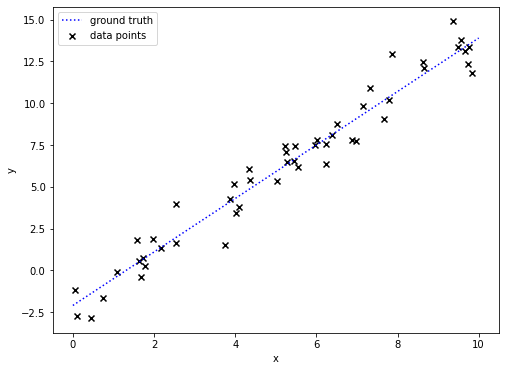

In [6]:
plot(x, y, (target_m, target_c))

Now let's set up our model using simple_autograd. First we need to import some useful modules.

In [7]:
from simple_autograd.autograd import print_tensor_registry, draw_computational_graph, _finalise_graph_debug
from simple_autograd.tensor import InputTensor, ParameterTensor
from simple_autograd.nn.functional import mean_squared_error
from simple_autograd.nn.initialisers import uniform_initialiser
from simple_autograd.nn.optim import SGD

Next we will set up the tensors and functions we will need in our training loop

In [8]:
# Define our trainable weights matrix first
model_weights = ParameterTensor(uniform_initialiser((1, 2))) # [1, 2]

# Define the model we will run in the forward pass
def model(X, W):
    return X * W.T # [N, 2] * [2, 1] -> [N, 1]

# Prepare our dataset (need to add column of ones so we can include offset term c in matrix multiplication)
data = np.hstack((np.expand_dims(x, 1), np.ones((x.shape[0], 1))))
labels = y.copy()
print(data.shape, labels.shape)

(50, 2) (50,)


Let's visualise the random starting model. It probably won't be well fit to the data points.

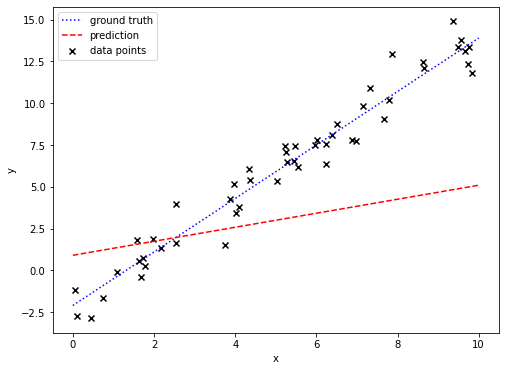

In [9]:
plot(x, y, (target_m, target_c), model_weights.data.squeeze().tolist())

Now we will define our training loop. Since our dataset is small we'll use all examples in every iteration - Batch Gradient Descent.

In [10]:
def train(data, labels, model_weights, optimiser, iterations=100):
    loss_history = []

    for i in range(iterations):
        X = InputTensor(data)
        Y = InputTensor(labels)
        X_predicted = model(X, model_weights)
        loss = mean_squared_error(X_predicted.squeeze(), Y)
        # print_tensor_registry()
        # _finalise_graph_debug(); draw_computational_graph()

        loss_history.append(loss.data.copy())
        loss.backward()
#         optimiser.step()

    return loss_history

Lastly we need to define our optimiser and run our training loop.

In [11]:
optimiser = SGD(lr=0.0001)

In [12]:
loss_history = train(data, labels, model_weights, optimiser, iterations=1)

TypeError: unsupported operand type(s) for *: 'float' and 'Tensor'

Let's plot the loss to see if optimisation has converged.

In [ ]:
x_vals = np.arange(len(loss_history)).tolist()
plt.plot(x_vals, loss_history)
plt.xlabel("Iteration number")
plt.ylabel("Loss value")
plt.show()